In [1]:
import pandas as pd

pbp_data = pd.read_csv('data/pbp/2018.csv', sep=",", encoding='iso-8859-1')
pbp_data.id.nunique()

153544

In [2]:
pbp_data.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,drive_id,period,clock.minutes,clock.seconds,yard_line,down,distance,yards_gained,play_type,play_text
0,401012246101867401,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,13,25,46,1,10,7,Pass Reception,Tua Tagovailoa pass complete to Irv Smith Jr. ...
1,401012246101884401,Alabama,SEC,Louisville,ACC,Alabama,Louisville,7,0,4010122461,1,11,55,89,2,2,11,Passing Touchdown,Tua Tagovailoa pass complete to Jerry Jeudy fo...
2,401012246101849902,Louisville,ACC,Alabama,SEC,Alabama,Louisville,0,0,4010122461,1,15,0,65,1,10,0,Kickoff,Evan O'Hara kickoff for 58 yds
3,401012246101874901,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,12,50,53,2,3,28,Pass Reception,Tua Tagovailoa pass complete to DeVonta Smith ...
4,401012246101858901,Alabama,SEC,Louisville,ACC,Alabama,Louisville,0,0,4010122461,1,14,10,38,2,7,-6,Sack,Tua Tagovailoa sacked by G.G. Robinson for a l...


In [3]:
cleaned_pbp_data = pbp_data[
    pbp_data.down != 0
]
cleaned_pbp_data.id.nunique()

150393

In [4]:
non_garbage_time_data = cleaned_pbp_data[
    abs(cleaned_pbp_data.offense_score - cleaned_pbp_data.defense_score) <= 20
]
non_garbage_time_data.id.nunique()

120689

In [5]:
downs = [1, 2, 3, 4]
for d in downs:
    intermed = non_garbage_time_data[
        non_garbage_time_data.down == d
    ]
    print(f"number of instances of down {d}: {intermed.id.nunique()} ({100 * intermed.id.nunique() / non_garbage_time_data.id.nunique()}%)")

number of instances of down 1: 50812 (42.10159998011418%)
number of instances of down 2: 34213 (28.348068175227237%)
number of instances of down 3: 22571 (18.701787238273578%)
number of instances of down 4: 13090 (10.84605887860534%)


In [6]:
drive_data = pd.read_json('data/drives/2018.json')
drive_data.head()

,defense,defense_conference,drive_result,elapsed,end_period,end_time,end_yardline,game_id,id,offense,offense_conference,plays,scoring,start_period,start_time,start_yardline,yards
0,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65
1,Alabama,SEC,PUNT,"{'minutes': 1, 'seconds': 45}",1,"{'minutes': 10, 'seconds': 10}",55,401012246,4010122462,Louisville,ACC,4,False,1,"{'minutes': 11, 'seconds': 55}",75,20
2,Louisville,ACC,FUMBLE,"{'minutes': 3, 'seconds': 6}",1,"{'minutes': 7, 'seconds': 4}",65,401012246,4010122463,Alabama,SEC,8,False,1,"{'minutes': 10, 'seconds': 10}",20,63
3,Alabama,SEC,PUNT,{'minutes': 1},1,"{'minutes': 6, 'seconds': 4}",84,401012246,4010122464,Louisville,ACC,3,False,1,"{'minutes': 7, 'seconds': 4}",83,-1
4,Louisville,ACC,TD,{'minutes': 2},1,"{'minutes': 4, 'seconds': 4}",100,401012246,4010122465,Alabama,SEC,6,True,1,"{'minutes': 6, 'seconds': 4}",45,55


In [7]:
# drive_data.drive_result.value_counts(normalize=True)
# cleaned_yards = drive_data.start_yardline.apply(lambda x: x % 50)
drive_data.start_yardline.value_counts(bins=[0,10,20,30,40,50])

(20.0, 30.0]      4358
(10.0, 20.0]      1984
(30.0, 40.0]      1961
(40.0, 50.0]      1362
(-0.001, 10.0]     975
Name: start_yardline, dtype: int64

In [8]:
new_df = pd.merge(drive_data,
                 non_garbage_time_data[['drive_id','away','home']],
                 left_on='id',
                 right_on='drive_id')

new_df.loc[
    new_df.offense == new_df.away, ['start_yardline']
] = 100 - new_df.start_yardline
new_df.loc[
    new_df.offense == new_df.away, ['end_yardline']
] = 100 - new_df.end_yardline
new_df.head()

,defense,defense_conference,drive_result,elapsed,end_period,end_time,end_yardline,game_id,id,offense,offense_conference,plays,scoring,start_period,start_time,start_yardline,yards,drive_id,away,home
0,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
1,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
2,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
3,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama
4,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,"{'minutes': 15, 'seconds': 0}",35,65,4010122461,Louisville,Alabama


Text(0, 0.5, 'Density')

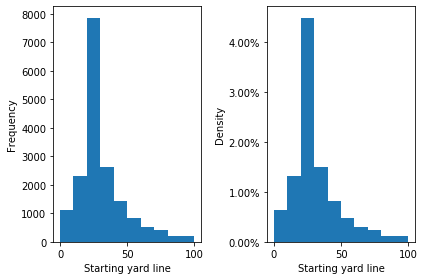

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

coll_df = new_df.drop_duplicates(subset='id')
coll_df.head()

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(coll_df.start_yardline, bins=10)

# # We can also normalize our inputs by the total number of counts
axs[1].hist(coll_df.start_yardline, bins=10, density=True)

# # Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

axs[0].set_xlabel('Starting yard line')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Starting yard line')
axs[1].set_ylabel('Density')

In [10]:
coll_df.start_yardline.value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100])

(20.0, 30.0]      7236
(10.0, 20.0]      3096
(30.0, 40.0]      2476
(-0.001, 10.0]    1353
(40.0, 50.0]      1303
(50.0, 60.0]       798
(60.0, 70.0]       488
(70.0, 80.0]       417
(90.0, 100.0]      172
(80.0, 90.0]       172
Name: start_yardline, dtype: int64

In [11]:
coll_df.drive_result.value_counts()

PUNT                  6613
TD                    4865
FG                    1555
INT                    994
DOWNS                  884
FUMBLE                 776
MISSED FG              559
END OF HALF            477
END OF GAME            282
Uncategorized          173
INT TD                  99
FUMBLE TD               65
SF                      54
PUNT TD                 37
PUNT RETURN TD          36
END OF 4TH QUARTER      23
FUMBLE RETURN TD         8
MISSED FG TD             7
KICKOFF                  2
DOWNS TD                 2
Name: drive_result, dtype: int64

In [12]:
scoring_drives = coll_df[
    (coll_df.drive_result == 'TD') | (coll_df.drive_result == 'FG')
]
scoring_drives.id.nunique()

6420

In [33]:
cust_bins = np.linspace(1,100,100)
cust_bins

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [34]:
# Probability of an offensive TD drive given starting yard line within one of these bins
def prob(prb1, prb2):
    return prb1 / prb2

td = coll_df[
    (coll_df.drive_result == 'TD')
].start_yardline.value_counts(bins=cust_bins)
td_vars = pd.DataFrame({'yardline_bin':td.index, 'td_frequency':td.values})
td_vars['td_density'] = td_vars.td_frequency / coll_df.id.nunique()
td_vars

,yardline_bin,td_frequency,td_density
0,"(24.0, 25.0]",1067,0.060933
1,"(19.0, 20.0]",243,0.013877
2,"(34.0, 35.0]",145,0.008281
3,"(29.0, 30.0]",115,0.006567
4,"(20.0, 21.0]",90,0.005140
5,"(30.0, 31.0]",89,0.005083
6,"(25.0, 26.0]",88,0.005025
7,"(23.0, 24.0]",87,0.004968
8,"(26.0, 27.0]",81,0.004626
9,"(22.0, 23.0]",81,0.004626


In [35]:
# Probability of an offensive FG drive given starting yard line within one of these bins
fg = coll_df[
    (coll_df.drive_result == 'FG')
].start_yardline.value_counts(bins=cust_bins)
fg_vars = pd.DataFrame({'yardline_bin':fg.index, 'fg_frequency':fg.values})
fg_vars['fg_density'] = fg_vars.fg_frequency / coll_df.id.nunique()
fg_vars

,yardline_bin,fg_frequency,fg_density
0,"(24.0, 25.0]",322,0.018388
1,"(19.0, 20.0]",75,0.004283
2,"(34.0, 35.0]",45,0.002570
3,"(44.0, 45.0]",32,0.001827
4,"(28.0, 29.0]",31,0.001770
5,"(23.0, 24.0]",31,0.001770
6,"(29.0, 30.0]",30,0.001713
7,"(25.0, 26.0]",30,0.001713
8,"(35.0, 36.0]",25,0.001428
9,"(31.0, 32.0]",25,0.001428


In [36]:
combined = pd.merge(td_vars, fg_vars, on='yardline_bin')
combined
# combined now contains % of scoring AND position

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density
0,"(24.0, 25.0]",1067,0.060933,322,0.018388
1,"(19.0, 20.0]",243,0.013877,75,0.004283
2,"(34.0, 35.0]",145,0.008281,45,0.002570
3,"(29.0, 30.0]",115,0.006567,30,0.001713
4,"(20.0, 21.0]",90,0.005140,12,0.000685
5,"(30.0, 31.0]",89,0.005083,13,0.000742
6,"(25.0, 26.0]",88,0.005025,30,0.001713
7,"(23.0, 24.0]",87,0.004968,31,0.001770
8,"(26.0, 27.0]",81,0.004626,20,0.001142
9,"(22.0, 23.0]",81,0.004626,20,0.001142


In [37]:
# generating prob of a specific yard line bin
pos = coll_df.start_yardline.value_counts(bins=cust_bins, normalize=True)
p_pos = pd.DataFrame({'yardline_bin':pos.index, 'yardline_density':pos.values})

p_pos

,yardline_bin,yardline_density
0,"(24.0, 25.0]",0.244418
1,"(19.0, 20.0]",0.058478
2,"(34.0, 35.0]",0.026669
3,"(29.0, 30.0]",0.022272
4,"(25.0, 26.0]",0.019473
5,"(20.0, 21.0]",0.019074
6,"(23.0, 24.0]",0.019017
7,"(22.0, 23.0]",0.018845
8,"(27.0, 28.0]",0.018274
9,"(21.0, 22.0]",0.018046


In [38]:
combined = pd.merge(combined, p_pos, on='yardline_bin')
combined

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,yardline_density
0,"(24.0, 25.0]",1067,0.060933,322,0.018388,0.244418
1,"(19.0, 20.0]",243,0.013877,75,0.004283,0.058478
2,"(34.0, 35.0]",145,0.008281,45,0.002570,0.026669
3,"(29.0, 30.0]",115,0.006567,30,0.001713,0.022272
4,"(20.0, 21.0]",90,0.005140,12,0.000685,0.019074
5,"(30.0, 31.0]",89,0.005083,13,0.000742,0.015248
6,"(25.0, 26.0]",88,0.005025,30,0.001713,0.019473
7,"(23.0, 24.0]",87,0.004968,31,0.001770,0.019017
8,"(26.0, 27.0]",81,0.004626,20,0.001142,0.016732
9,"(22.0, 23.0]",81,0.004626,20,0.001142,0.018845


In [39]:
def conditional_prob(score_pos_prob, yd_prob):
    return score_pos_prob / yd_prob

combined['p_td_given_pos'] = np.vectorize(conditional_prob)(combined['td_density'], combined['yardline_density'])
combined['p_fg_given_pos'] = np.vectorize(conditional_prob)(combined['fg_density'], combined['yardline_density'])

def weighted_epa(td, fg):
    return 7 * td + 3 * fg

combined['ep'] = np.vectorize(weighted_epa)(combined['p_td_given_pos'], combined['p_fg_given_pos'])
combined['yardline'] = combined.yardline_bin.apply(lambda x: x.left)
combined


,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,yardline_density,p_td_given_pos,p_fg_given_pos,ep,yardline
0,"(24.0, 25.0]",1067,0.060933,322,0.018388,0.244418,0.249299,0.075234,1.970794,24.0
1,"(19.0, 20.0]",243,0.013877,75,0.004283,0.058478,0.237305,0.073242,1.880859,19.0
2,"(34.0, 35.0]",145,0.008281,45,0.002570,0.026669,0.310493,0.096360,2.462527,34.0
3,"(29.0, 30.0]",115,0.006567,30,0.001713,0.022272,0.294872,0.076923,2.294872,29.0
4,"(20.0, 21.0]",90,0.005140,12,0.000685,0.019074,0.269461,0.035928,1.994012,20.0
5,"(30.0, 31.0]",89,0.005083,13,0.000742,0.015248,0.333333,0.048689,2.479401,30.0
6,"(25.0, 26.0]",88,0.005025,30,0.001713,0.019473,0.258065,0.087977,2.070381,25.0
7,"(23.0, 24.0]",87,0.004968,31,0.001770,0.019017,0.261261,0.093093,2.108108,23.0
8,"(26.0, 27.0]",81,0.004626,20,0.001142,0.016732,0.276451,0.068259,2.139932,26.0
9,"(22.0, 23.0]",81,0.004626,20,0.001142,0.018845,0.245455,0.060606,1.900000,22.0


Linear Regression: y = 0.04411x + 0.89690
Regression Coefficients: [0.         0.01475271 0.00029355]
MSE: 1.4785
Polynomial Regression (with degree 2): y = 0.00000x^3 + 0.01475x^2 + 0.00029x + 1.39103
Regression Coefficients: [ 0.00000000e+00  5.50368004e-02 -7.08516674e-04  6.68042339e-06]
MSE: 1.5174
Polynomial Regression (with degree 3): y = 0.0000000x^4 + 0.0550368x^3 + -0.00071x^2 + 0.0000067x + 1.0469302
Regression Coefficients: [ 0.00000000e+00  3.19012482e-02  3.20428941e-04 -9.27141224e-06
  7.97594083e-08]
MSE: 1.5286
Polynomial Regression (with degree 4): y = 0.0000000x^5 + 0.0319012x^4 + 0.0003204x^3 + -0.00001x^2 + 0.0000001x + 1.1678301
Regression Coefficients: [ 0.00000000e+00  5.31001672e-02 -1.13381772e-03  2.92123566e-05
 -3.52073686e-07  1.72733966e-09]
MSE: 1.5377
Polynomial Regression (with degree 5): y = 0.0000000x^6 + 0.0531002x^5 + 0.0003204x^4 + 0.0000292x^3 + -0.00000x^2 + 0.0000000x + 1.0921935


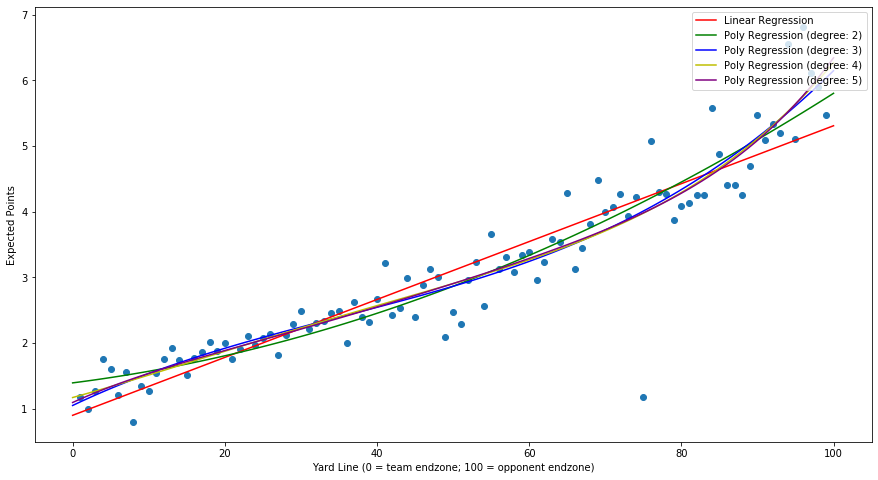

In [46]:
f, ax = plt.subplots(figsize=(15,8))
combined.sort_values(by=["yardline"])
ax.scatter(combined.yardline, combined.ep);
ax.set_xlabel("Yard Line (0 = team endzone; 100 = opponent endzone)")
ax.set_ylabel("Expected Points");

# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(combined.yardline[:, np.newaxis], combined.ep)
xfit = np.linspace(0, 100, 99)
yfit = model.predict(xfit[:, np.newaxis])
ax.plot(xfit, yfit, color='red', label='Linear Regression');
print(f'Linear Regression: y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}')

# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
def poly_regress(degree, plot, color):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(combined.yardline[:, np.newaxis])
    X_test_ = poly.fit_transform(xfit[:, np.newaxis])

    lg = LinearRegression()

    # Fit
    lg.fit(X_, combined.ep)

    # Obtain coefficients
    # lg.coef_

    quady_fit = lg.predict(X_test_)

    plot.plot(xfit, quady_fit, color=color, label=f'Poly Regression (degree: {degree})')
    print(f'Regression Coefficients: {lg.coef_}')
    error = mean_squared_error(combined.ep[:, np.newaxis], quady_fit)
    print(f'MSE: {error:.4f}')
    return lg

quad1 = poly_regress(2, ax, 'g')
print(f'Polynomial Regression (with degree 2): y = {quad1.coef_[0]:.5f}x^3 + {quad1.coef_[1]:.5f}x^2 + {quad1.coef_[2]:.5f}x + {quad1.intercept_:.5f}')

quad2 = poly_regress(3, ax, 'b')
print(f'Polynomial Regression (with degree 3): y = {quad2.coef_[0]:.7f}x^4 + {quad2.coef_[1]:.7f}x^3 + {quad2.coef_[2]:.5f}x^2 + {quad2.coef_[3]:.7f}x + {quad2.intercept_:.7f}')

quad3 = poly_regress(4, ax, 'y')
print(f'Polynomial Regression (with degree 4): y = {quad3.coef_[0]:.7f}x^5 + {quad3.coef_[1]:.7f}x^4 + {quad3.coef_[2]:.7f}x^3 + {quad3.coef_[3]:.5f}x^2 + {quad3.coef_[4]:.7f}x + {quad3.intercept_:.7f}')

quad4 = poly_regress(5, ax, 'purple')
print(f'Polynomial Regression (with degree 5): y = {quad4.coef_[0]:.7f}x^6 + {quad4.coef_[1]:.7f}x^5 + {quad3.coef_[2]:.7f}x^4 + {quad4.coef_[3]:.7f}x^3 + {quad4.coef_[4]:.5f}x^2 + {quad4.coef_[5]:.7f}x + {quad4.intercept_:.7f}');

ax.legend(loc='upper right');

In [41]:
# Testing 

modern_drive_data = pd.read_json('data/drives/2019.json')
# modern_data.head()

cleaned_modern_pbp_data = pd.read_json('data/pbp/2019.json')

cleaned_modern_pbp_data = cleaned_modern_pbp_data[
    cleaned_modern_pbp_data.down != 0
]

cleaned_modern_pbp_data = cleaned_modern_pbp_data[
    abs(cleaned_modern_pbp_data.offense_score - cleaned_modern_pbp_data.defense_score) <= 20
]
# cleaned_pbp_data.id.nunique()

verify_results = pd.merge(modern_drive_data[["id","game_id","start_yardline","end_yardline","drive_result","offense","defense"]],
                 cleaned_modern_pbp_data[['drive_id','away','home']],
                 left_on='id',
                 right_on='drive_id')

verify_results.loc[
    verify_results.offense == verify_results.away, ['start_yardline']
] = 100 - verify_results.start_yardline
verify_results.loc[
    verify_results.offense == verify_results.away, ['end_yardline']
] = 100 - verify_results.end_yardline

yardlines = verify_results.start_yardline
test_input = np.random.choice(a=verify_results.start_yardline, size=99)

test_dataset = pd.DataFrame({'yardline':test_input})

test_dataset['quad0_ep_prediction'] = model.predict(test_dataset.yardline[:, np.newaxis])
test_dataset['quad0_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad0_ep_prediction'])
test_dataset.head()

yardline_quad1 = PolynomialFeatures(degree=2).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad1_ep_prediction'] = quad1.predict(yardline_quad1)
test_dataset['quad1_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad1_ep_prediction'])
test_dataset.head()

yardline_quad2 = PolynomialFeatures(degree=3).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad2_ep_prediction'] = quad2.predict(yardline_quad2)
test_dataset['quad2_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad2_ep_prediction'])
test_dataset.head()

yardline_quad3 = PolynomialFeatures(degree=4).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad3_ep_prediction'] = quad3.predict(yardline_quad3)
test_dataset['quad3_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad3_ep_prediction'])
test_dataset.head()

yardline_quad4 = PolynomialFeatures(degree=5).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad4_ep_prediction'] = quad4.predict(yardline_quad4)
test_dataset['quad4_ep_prediction_error'] = mean_squared_error(combined.ep[:, np.newaxis], test_dataset['quad4_ep_prediction'])
test_dataset.head()

,yardline,quad0_ep_prediction,quad0_ep_prediction_error,quad1_ep_prediction,quad1_ep_prediction_error,quad2_ep_prediction,quad2_ep_prediction_error,quad3_ep_prediction,quad3_ep_prediction_error,quad4_ep_prediction,quad4_ep_prediction_error
0,28,2.131903,3.125689,2.034249,3.15063,2.179132,2.928284,2.15778,2.975858,2.144679,2.980324
1,23,1.911367,3.125689,1.885632,3.15063,2.019252,2.928284,1.98058,2.975858,1.981728,2.980324
2,28,2.131903,3.125689,2.034249,3.15063,2.179132,2.928284,2.15778,2.975858,2.144679,2.980324
3,40,2.661189,3.125689,2.450815,3.15063,2.542323,2.928284,2.56738,2.975858,2.547254,2.980324
4,25,1.999581,3.125689,1.943318,3.15063,2.084409,2.928284,2.05192,2.975858,2.046844,2.980324
